# Assignment 8
## By: **Nils Dunlop, e-mail: gusdunlni@student.gu.se**

## Problem 1

In [23]:
class Palindrome:
    def __init__(self, word):
        # Splitting the string into a stack and queue
        self.stack, self.queue = self.split_string(word)

    def check_palindrome(self):
        # Check if the reversed stack matches the queue
        return self.stack == list(reversed(self.queue))

    @staticmethod
    def split_string(word):
        # Removing punctuation and converting to lowercase
        clean_string = ''.join(e for e in word if e.isalnum()).lower()

        # Splitting the string into individual characters
        elements = list(clean_string)

        mid_point = len(elements) // 2

        # Assigning first half to stack and second half to queue
        stack = elements[:mid_point]
        queue = elements[mid_point:]

        # If the string is odd, remove the first element from the queue
        if len(elements) % 2 != 0:
            queue.pop(0)

        return stack, queue

if __name__ == "__main__":
    # print("This program checks if your text is a palindrome!")
    # text = input(’Please enter your text: ’ )
    # check_palindrome(text)
    
    # True
    print("...True...")
    print(Palindrome("tattarrattat").check_palindrome())
    print(Palindrome("Able was I ere I saw Elba").check_palindrome())
    print(Palindrome("jajjjjaj").check_palindrome())
    print(Palindrome("jajjjaj").check_palindrome())
    print(Palindrome("jaJjjaJ").check_palindrome())
    print(Palindrome("jaJjjaJ").check_palindrome())
    print(Palindrome("1881").check_palindrome())
    print(Palindrome("181").check_palindrome())
    
    # False
    print("...False...")
    print(Palindrome("jaxxj").check_palindrome())
    print(Palindrome("jajaja").check_palindrome())
    print(Palindrome("18818").check_palindrome())

...True...
True
True
True
True
True
True
True
True
...False...
False
False
False


## Problem 2

In [24]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("data.csv", sep=";")

# Read the informative data
df_info = pd.read_csv("Data_L15_info.csv")

#### What are the subjects that are particularly bad in terms of having high dropout?

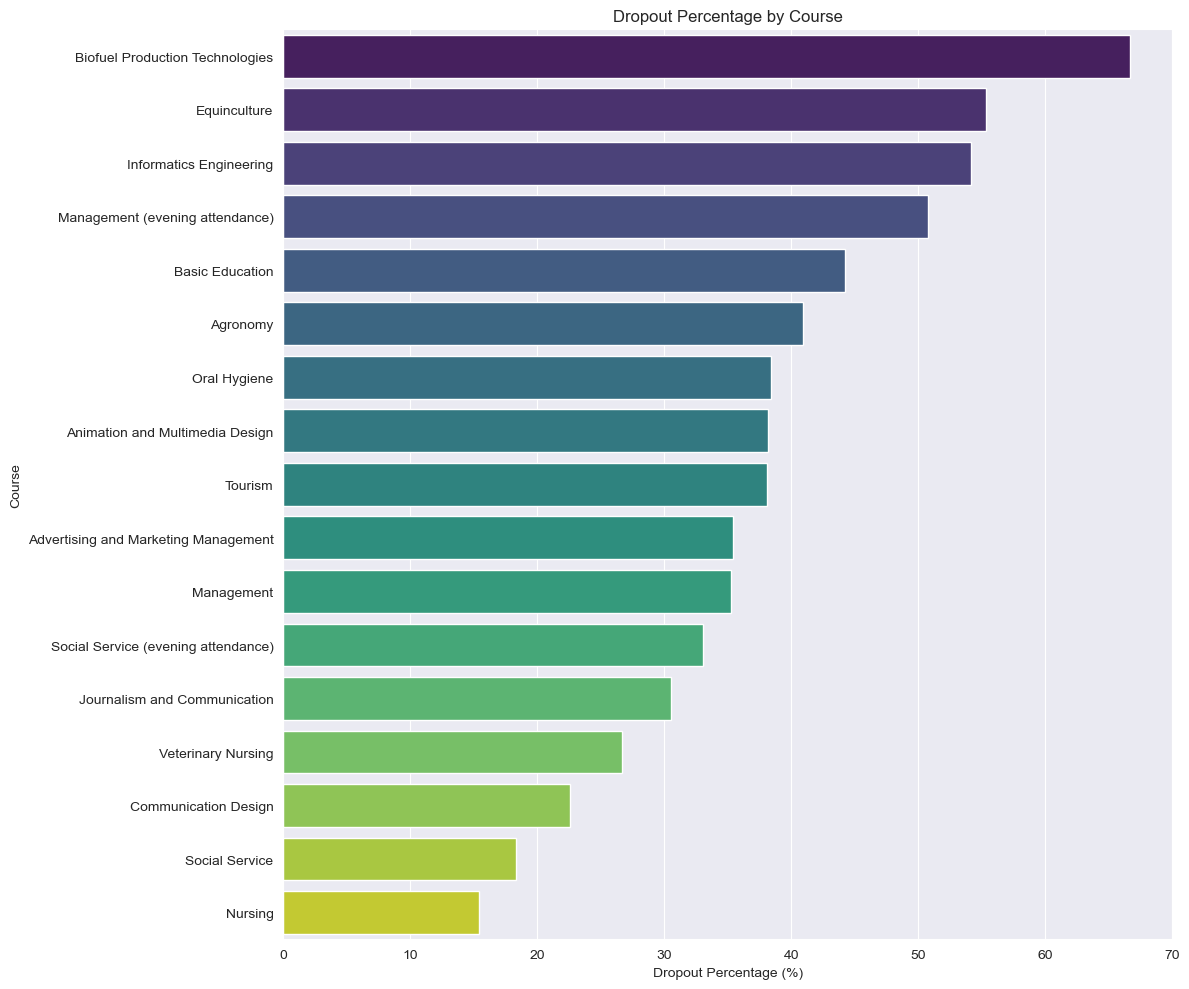

In [25]:
# Calculate dropout percentage per course
total_students_per_course = df.groupby('Course').size()
dropout_df = df[df['Target'] == 'Dropout']
course_dropout_counts = dropout_df.groupby('Course').size()
dropout_percentage = (course_dropout_counts / total_students_per_course) * 100
sorted_dropout_percentage = dropout_percentage.sort_values(ascending=False)
sorted_courses = course_dropout_counts.sort_values(ascending=False)

# Map course codes to course names
course_descriptions = df_info[df_info['Attribute Name'] == 'Course']['Description'].iloc[0]
splits = re.split(r'(?=\b\d+ -)', course_descriptions)
course_mapping = {}
for split in splits:
    if '-' in split:
        code, name = [item.strip() for item in split.split('-')]
        course_mapping[int(code)] = name

# Create a dataframe for plotting
dropout_percentage_df = pd.DataFrame({
    "Course": sorted_dropout_percentage.index.map(course_mapping).tolist(),
    "Dropout %": sorted_dropout_percentage.values
})

# Function for plotting a bar plot from a dataframe
def dataframe_barplot(dataframe):
    # Setting the figure size
    plt.figure(figsize=(12, 10))

    # Create a horizontal bar plot
    sns.barplot(x='Dropout %', y='Course', data=dataframe, palette='viridis')

    # Setting title and labels
    plt.title('Dropout Percentage by Course')
    plt.xlabel('Dropout Percentage (%)')
    plt.ylabel('Course')

    plt.tight_layout()
    plt.show()

dataframe_barplot(dropout_percentage_df)

### Answer:
Upon analyzing the graph above, the courses that exhibit particularly high dropout rates are:
1. **Biofuel Production Technologies**: This stands out as the most challenging in terms of student retention, with a dropout rate nearing 70%.
2. **Equiculture**: Following closely, this course has a dropout rate that's slightly below that of Biofuel Production Technologies but remains substantially high.
3. **Informatics Engineering**: This course demonstrates a concerning dropout rate, falling just under 50%.

The high dropout rates for these courses suggest there might be underlying issues or challenges that students face, leading them to not complete the course. Further research or surveys might be necessary to pinpoint the exact reasons and to implement strategies for improvement.

#### What are the subjects that are particularly successful?

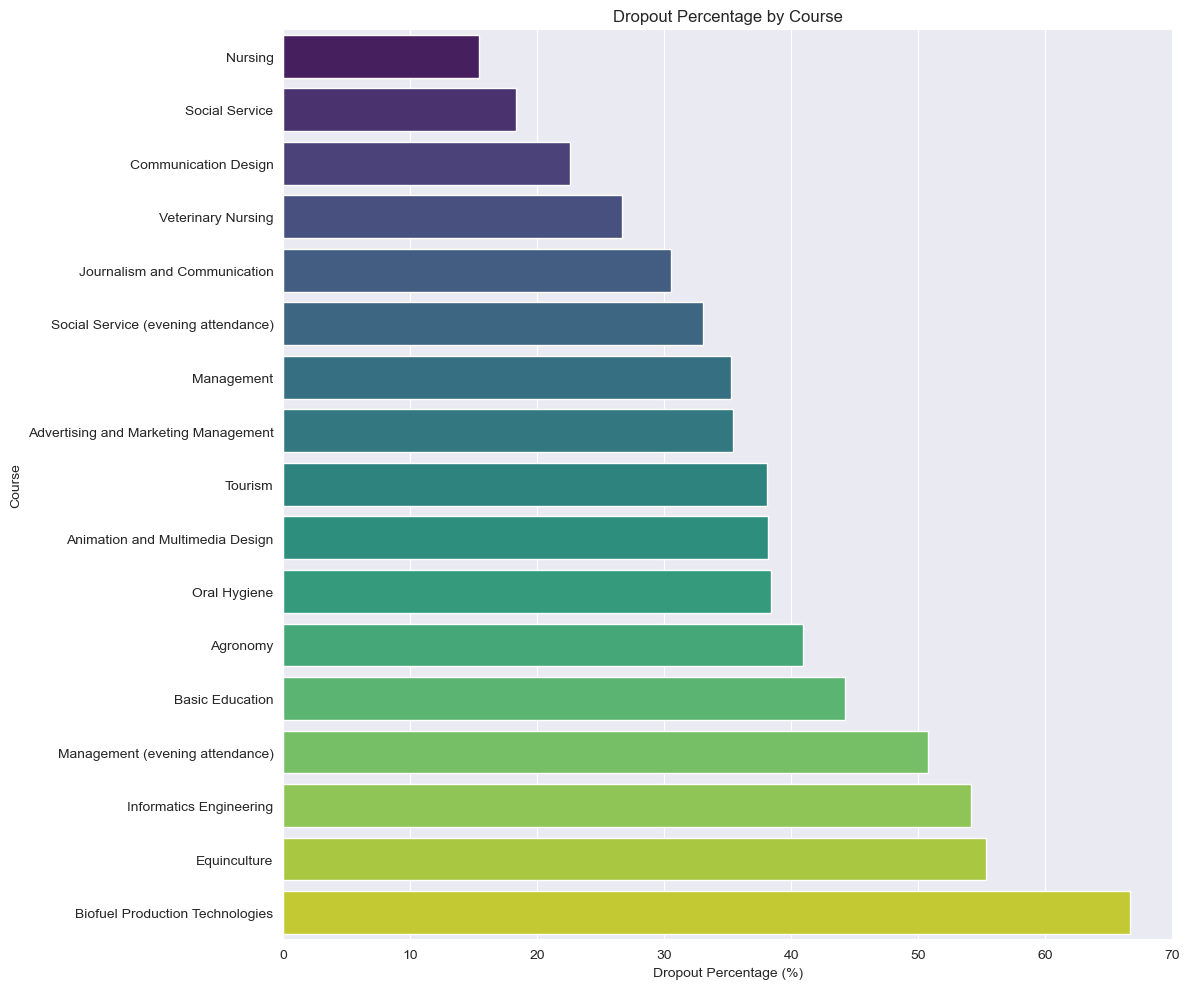

In [26]:
# Flip the dataframe to get the courses with the lowest dropout percentage
dropout_percentage_df = dropout_percentage_df.sort_values(by='Dropout %', ascending=True)

# Plot the results 
dataframe_barplot(dropout_percentage_df)

### Answer:
Upon analyzing the graph above, the courses positioned at the top exhibit the lowest dropout rates indicating success in terms of retaining students. The courses with the lowest dropout rates are: Nursing with the least dropout percentage, followed by Social Service and Communication Design, both of which also demonstrate commendably low dropout rates. Such low dropout percentages suggest a combination of high student engagement, effective course instruction, and overall student satisfaction. It's evident that these subjects have been well-received, ensuring students' dedication and perseverance through their studies.

#### The institution wants to save resources by closing the evening classes. Does the data support for or against the institution’s plan?

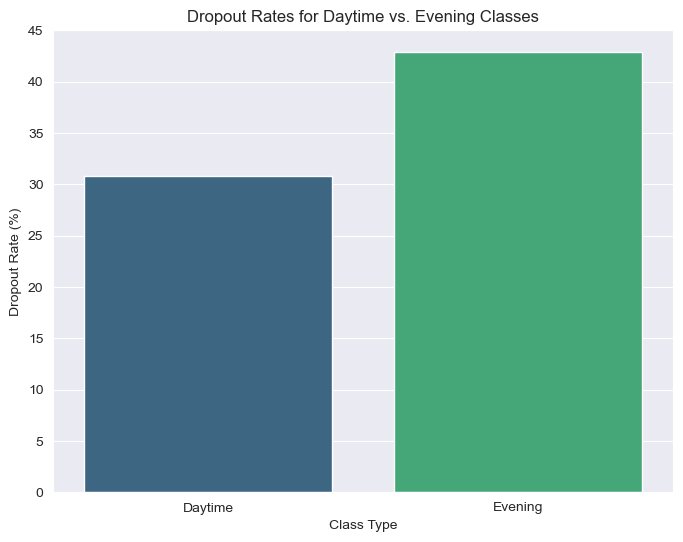

In [27]:
# Split the dataframe into daytime and evening classes
daytime_df = df[df['Daytime/evening attendance\t'] == 1]
evening_df = df[df['Daytime/evening attendance\t'] == 0]

# Calculate dropout rates
daytime_dropout_rate = (len(daytime_df[daytime_df['Target'] == 'Dropout']) / len(daytime_df)) * 100
evening_dropout_rate = (len(evening_df[evening_df['Target'] == 'Dropout']) / len(evening_df)) * 100

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=['Daytime', 'Evening'], y=[daytime_dropout_rate, evening_dropout_rate], palette='viridis')
plt.title('Dropout Rates for Daytime vs. Evening Classes')
plt.ylabel('Dropout Rate (%)')
plt.xlabel('Class Type')
plt.show()

### Answer:
The graph shows that evening classes have a higher dropout rate (~45%) compared to daytime classes (just above 30%). This suggests that more students discontinue their studies in the evening classes. Based on dropout rates alone, the data supports the institution's plan to close evening classes. However, understanding the reasons behind these dropouts is crucial. While the data points towards the closure of evening classes to save resources, considering the needs of students who can only attend evening classes due to other commitments is essential before making a final decision.

#### Is there any correlation between ”Previous qualification (grade)” and ”Admission grade”? If so, how strong/how weak is the correlation?

The correlation between 'Previous qualification (grade)' and 'Admission grade' is: 0.58


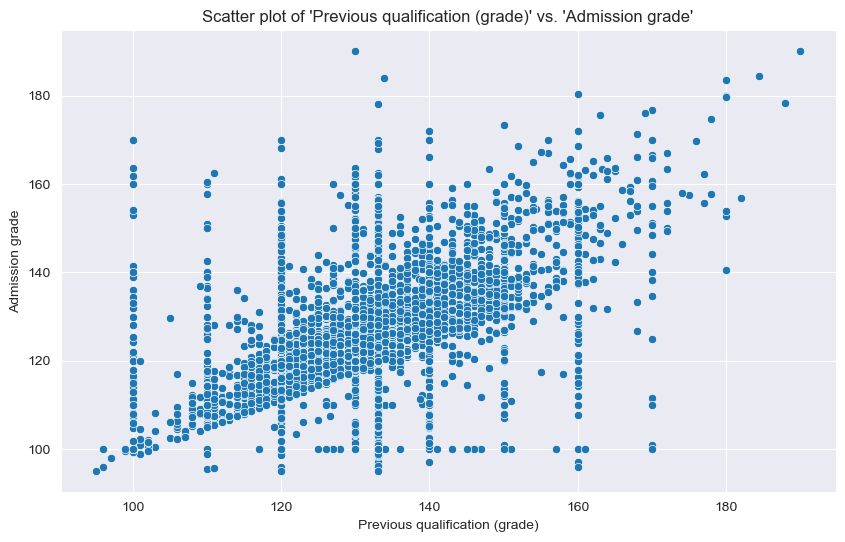

In [28]:
# Calculate the correlation
correlation = df["Previous qualification (grade)"].corr(df["Admission grade"])
print(f"The correlation between 'Previous qualification (grade)' and 'Admission grade' is: {correlation:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Previous qualification (grade)"], y=df["Admission grade"])
plt.title("Scatter plot of 'Previous qualification (grade)' vs. 'Admission grade'")
plt.show()

### Answer:
The scatter plot visually indicates a positive correlation between 'Previous qualification (grade)' and 'Admission grade', as the points generally trend upwards from the bottom left to the top right. Quantitatively, a correlation coefficient of 0.58 suggests a moderate positive relationship between the two variables. This means that as the 'Previous qualification (grade)' increases, the 'Admission grade' also tends to increase, and vice versa. While there's a clear association, other factors could influence the 'Admission grade' beyond just the 'Previous qualification'.

#### How do the female and male students compare in terms of dropout?

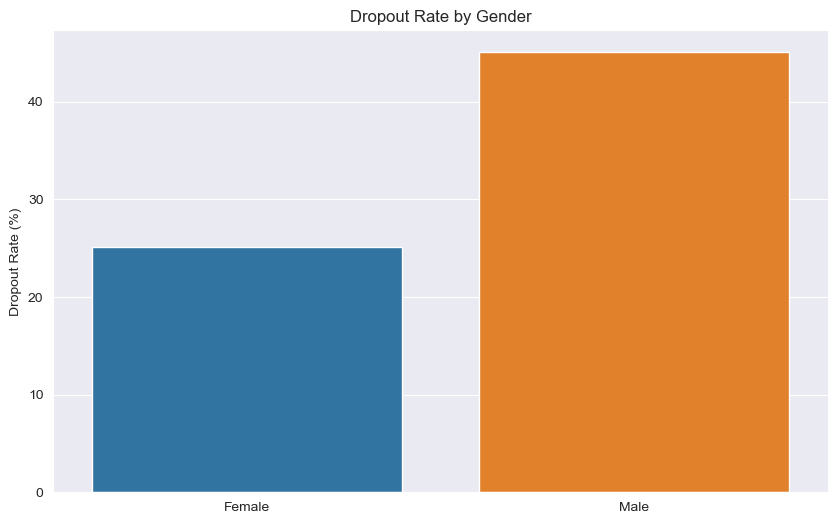

In [29]:
# Calculate dropout rates by gender
dropout_counts = dropout_df['Gender'].value_counts()
total_counts = df['Gender'].value_counts()
dropout_rate = (dropout_counts / total_counts) * 100

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=dropout_rate.index, y=dropout_rate.values)
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rate by Gender')
gender_labels = ['Female', 'Male']
plt.xticks(ticks=[0, 1], labels=gender_labels)
plt.show()

### Answer:
The graph showcases the dropout rates for female and male students. From the visual representation, it is evident that female students have a notably lower dropout rate compared to male students. Specifically, the dropout rate for female students is around 20%, while for male students, it's close to 40%. In summary, male students exhibit a significantly higher dropout rate than their female counterparts.

#### What is the age at enrollment, at which we see a turning point from more graduate to more dropout?

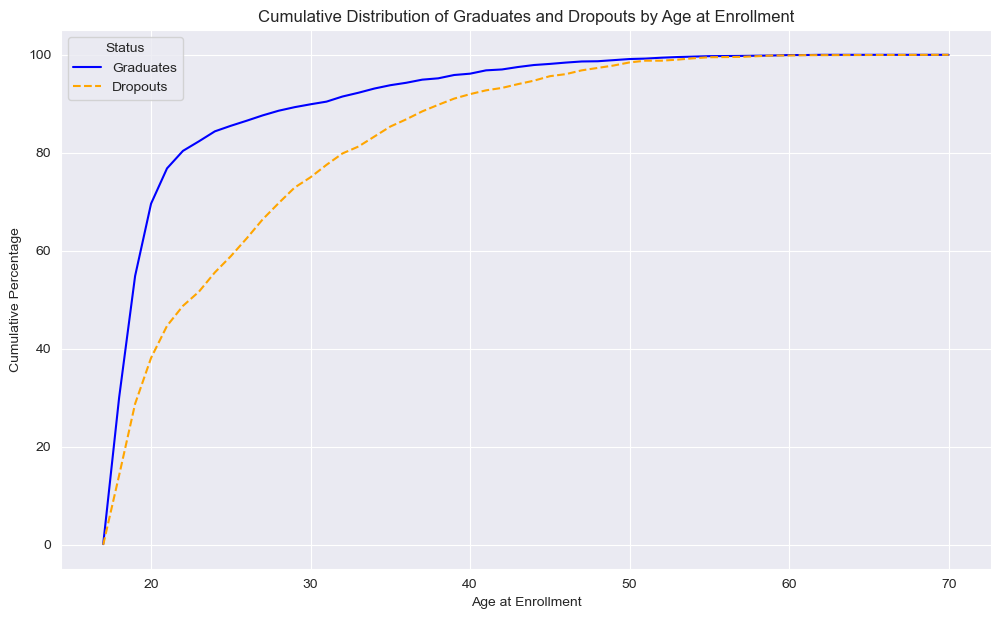

In [30]:
# Group by age and target and calculate counts
grouped = df.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)

# Calculate cumulative percentage
grouped['cumulative_grad'] = grouped['Graduate'].cumsum() / grouped['Graduate'].sum() * 100
grouped['cumulative_dropout'] = grouped['Dropout'].cumsum() / grouped['Dropout'].sum() * 100

# Plot the results
plt.figure(figsize=(12, 7))
sns.lineplot(data=grouped['cumulative_grad'], label='Graduates', color='blue')
sns.lineplot(data=grouped['cumulative_dropout'], label='Dropouts', color='orange', linestyle='--')
plt.title('Cumulative Distribution of Graduates and Dropouts by Age at Enrollment')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Age at Enrollment')
plt.legend(title='Status')
plt.show()

### Answer:
Based on the graph the turning point where the cumulative percentage of dropouts surpasses the cumulative percentage of graduates appears to be around the age of 30. At this age, the dropout curve intersects with the graduates curve, indicating a shift in the trend. From this point onwards, while the percentage of graduates remains relatively steady, the percentage of dropouts continues to increase.